In [ ]:


import numpy as np
import netCDF4 as nc
with nc.Dataset('../ROSES2024/data/convective_training_data_ext.nc','r') as ncf:
    zKuObs = ncf['zKuObs'][:]
    zKaObs = ncf['zKaObs'][:]
    binZeroDeg = ncf['binZeroDeg'][:]
    pia_HB_DPR = ncf['pia_HB_DPR'][:]
    pia_HB_CMB = ncf['pia_HB_CMB'][:]
    binClutterFree = ncf['binClutterFree'][:]
    binRealSurface = ncf['binRealSurface'][:]
    jRay = ncf['jRay'][:]
    logdNw= ncf['logdNw'][:]
    binStormTop= ncf['binStormTop'][:]
    nearSurfPrecipTotRate = ncf['nearSurfPrecipTotRate'][:]
    precipTotRate=ncf['precipTotRate'][:]
    dmTotCMB=ncf['dmTotCMB'][:]
    srtPIA = ncf['srtPIAKu'][:,0]
n_bins_L=[]


In [443]:
print(binZeroDeg.mean())
dn_mean=np.log10(0.08e8)
print(dn_mean)


142.35338316693395
6.903089986991944


In [444]:
dbinL=[]
zmL=[]
log10dNL=[]
icount=0
nSeq_train_L=[]
x_train_L=[]
y_train_L=[]
nSeq_val_L=[]
x_val_L=[]
y_val_L=[]
ic=0
dmTotCMB[dmTotCMB<0]=0
for i in range(zKaObs.shape[0]):
    n_bins_prof=binClutterFree[i]-binStormTop[i]
    n_bins_L.append(n_bins_prof)
    top=binStormTop[i]
    bot=binClutterFree[i]
    top2=binStormTop[i]//2
    bot2=binClutterFree[i]//2
    zm1=np.log10((10**(0.1*zKuObs[i,2*top2:2*bot2][::2])+10**(0.1*zKuObs[i,2*top2:2*bot2+1][1::2])+1e-3)/2)*10
    zm1[zm1<0]=0
    zm2=np.log10((10**(0.1*zKaObs[i,2*top2:2*bot2][::2])+10**(0.1*zKaObs[i,2*top2:2*bot2+1][1::2])+1e-3)/2)*10
    zm2[zm2<0]=0
    zmL.extend(zm1)
    log10dN_cmb=logdNw[i,top2:bot2]
    log10dN_cmb[log10dN_cmb<0]=6.9
    log10dNL.extend(log10dN_cmb-6.9)
    dbin=(np.arange(top2,bot2)-binZeroDeg[i]//2)
    precipCMB1=precipTotRate[i,top2:bot2]
    if ic%100<66:
        x_train_L.append([(zm1-27)/8.,(zm2-27)/8.,dbin/23.0,log10dN_cmb-6.9,precipCMB1,dmTotCMB[i,top2:bot2]])
        y_train_L.append([log10dN_cmb-6.9,pia_HB_CMB[i,0],nearSurfPrecipTotRate[i]])  
        nSeq_train_L.append((bot2-top2))
    else:
        x_val_L.append([(zm1-27)/8.,(zm2-27)/8.,dbin/23.0,log10dN_cmb-6.9,precipCMB1,dmTotCMB[i,top2:bot2]])
        y_val_L.append([log10dN_cmb-6.9,pia_HB_CMB[i,0],nearSurfPrecipTotRate[i]])  
        nSeq_val_L.append((bot2-top2))
    if bot2-top2>80:
        print(bot2,top2)
        break
    dbinL.extend(dbin/23)
    ic+=1
    if zm1.shape[0]==log10dN_cmb.shape[0]:
        icount+=1
print(icount,ic)

77324 77324


In [381]:
n_seq_max=max(np.max(nSeq_train_L),np.max(nSeq_val_L))
x_train_padded=[]
y_train_seq_padded=[]
y_train_scalar=[]
n_seq_train=[]
n_seq_val=[]
x_val_padded=[]
y_val_seq_padded=[]
y_val_scalar=[]
for i,nseq in enumerate(nSeq_train_L):
    if nseq<1:
        continue
    x1_train=np.zeros((n_seq_max,5))
    x1_train[:nseq,0]=x_train_L[i][0]
    x1_train[:nseq,1]=x_train_L[i][1]
    x1_train[:nseq,2]=x_train_L[i][2]
    x1_train[:nseq,3]=x_train_L[i][3]
    x1_train[:nseq,4]=x_train_L[i][4]
    x_train_padded.append(x1_train)
    y1=np.zeros((n_seq_max,2))
    y1[:nseq,0]=y_train_L[i][0]
    y1[:nseq,1]=np.log10(1+x_train_L[i][3]/0.1)
    y_train_seq_padded.append(y1)
    y_train_scalar.append([np.log10(1+y_train_L[i][1])*3,np.log10(1+y_train_L[i][2]/0.1)])
    n_seq_train.append(nseq)

for i, nseq in enumerate(nSeq_val_L):
    if nseq<1:
        continue
    x1_val=np.zeros((n_seq_max,5))
    x1_val[:nseq,0]=x_val_L[i][0]
    x1_val[:nseq,1]=x_val_L[i][1]
    x1_val[:nseq,2]=x_val_L[i][2]
    x1_val[:nseq,3]=x_val_L[i][3]
    x1_val[:nseq,4]=x_val_L[i][4]
    x_val_padded.append(x1_val)
    y1=np.zeros((n_seq_max,2))
    y1[:nseq,0]=y_val_L[i][0]
    y1[:nseq,1]=np.log10(1+x_val_L[i][3]/0.1)
    y_val_seq_padded.append(y1)
    y_val_scalar.append([np.log10(1+y_val_L[i][1])*3,np.log10(1+y_val_L[i][2]/0.1)])
    n_seq_val.append(nseq)

In [383]:
y_train_seq_padded=np.array(y_train_seq_padded)
y_train_scalar=np.array(y_train_scalar)
x_train_padded=np.array(x_train_padded)
n_seq_train=np.array(n_seq_train)
y_val_seq_padded=np.array(y_val_seq_padded)
y_val_scalar=np.array(y_val_scalar)
x_val_padded=np.array(x_val_padded)
n_seq_val=np.array(n_seq_val)

print(x_train_padded[:,:,-1].min())
print(x_train_padded[:,:,-1].max())


0.0
4.26629114151001


In [385]:
from sklearn.cluster import KMeans
nc_knn=120
kmeans = KMeans(n_clusters=nc_knn, random_state=0)
nz=padded_input.shape[1]
kmeans.fit(x_train_padded[:,:,0:2].reshape(-1,2*nz))

KMeans(n_clusters=120, random_state=0)

In [365]:
from sklearn.mixture import GaussianMixture
nc_gmm=60
kmeans_gmm = KMeans(n_clusters=nc_gmm, random_state=0)
nz=padded_input.shape[1]
kmeans_gmm.fit(x_train_padded[:,:,0:2].reshape(-1,2*nz))
nc_gmm = 60
gmm = GaussianMixture(n_components=nc_gmm, init_params='random', random_state=0)
nz = padded_input.shape[1]
gmm.fit(x_train_padded[:,:,0:2].reshape(-1, 2*nz))

GaussianMixture(init_params='random', n_components=60, random_state=0)

In [366]:
#gmmpred = gmm.predict(x_train_padded[:,:,0:2].reshape(-1, 2*nz))
#print(gmmpred.shape)
#print(gmmpred[0:100])
#gmm_proba=gmm.predict_proba(x_train_padded[:,:,0:2].reshape(-1, 2*nz))
import pickle
with open('gmm_60.pkl','wb') as f:
    pickle.dump(gmm,f)
gmm_classes=gmm.predict(x_train_padded[:,:,0:2].reshape(-1, 2*nz))

In [ ]:
sfcPrecipClass=[]
ncounts=[]
# import rigde regression model
from sklearn.linear_model import Ridge
rigdRegModels=[]
x_train_padded[x_train_padded<-90]=0
x_val_padded[x_val_padded<-90]=0
ymClass_gmm=[]
xmClass_gmm=[]
kgainClass_gmm=[]
n_seq_max_Class_gmm=[]
nf=2
for i in range(nc_gmm):
    a=np.where(gmm_classes==i)
    n_seq_max_a=np.max(n_seq_train[a])
    n_seq_max_Class_gmm.append(n_seq_max_a)
    sfcPrecipClass.append(y_train_scalar[:,1][a].mean())
    y1=x_train_padded[a][:,:n_seq_max_a,0:nf].reshape(-1,nf*n_seq_max_a)
    x1=x_train_padded[a][:,:n_seq_max_a,3].reshape(-1,n_seq_max_a)
    covXY_=np.cov(x1.T,y1.T)
    covYY=covXY_[n_seq_max_a:,n_seq_max_a:]+0.025*np.eye(nf*n_seq_max_a)
    covXY=covXY_[:n_seq_max_a,n_seq_max_a:]
    kgain=np.dot(covXY,np.linalg.pinv(covYY))
    xmClass_gmm.append(x1.mean(axis=0))
    ymClass_gmm.append(y1.mean(axis=0))
    kgainClass_gmm.append(kgain)


gmm_labels=gmm.predict(x_val_padded[:,:,0:2].reshape(-1,2*nz))
predL=[]
validL=[]
for i, x_val in enumerate(x_val_padded):
    a=np.where(gmm_labels==i)
    n_seq_max_a=n_seq_max_Class_gmm[gmm_labels[i]]
    y1=x_val[:n_seq_max_a,0:nf].reshape(nf*n_seq_max_a)
    x1=x_val[:n_seq_max_a,3].reshape(n_seq_max_a)

    x1_pred=xmClass_gmm[gmm_labels[i]]+np.dot(kgainClass_gmm[gmm_labels[i]],y1-ymClass_gmm[gmm_labels[i]])
    if n_seq_val[i]<n_seq_max_a:
        x1_pred[n_seq_val[i]:]=0
    predL.extend(x1_pred[:n_seq_max_a])
    validL.extend(x1[:n_seq_max_a])
    

[[1.         0.78798664]
 [0.78798664 1.        ]]


In [449]:
sfcPrecipClass=[]
ncounts=[]
# import rigde regression model
from sklearn.linear_model import Ridge
rigdRegModels=[]
x_train_padded[x_train_padded<-90]=0
x_val_padded[x_val_padded<-90]=0
ymClass=[]
xmClass=[]
kgainClass=[]
n_seq_max_Class=[]
cov_error_Class=[]
mean_error_Class=[]
nf=2
for i in range(nc_knn):
    a=np.where(kmeans.labels_==i)
    n_seq_max_a=np.max(n_seq_train[a])
    n_seq_max_Class.append(n_seq_max_a)
    sfcPrecipClass.append(y_train_scalar[:,1][a].mean())
    y1=x_train_padded[a][:,:n_seq_max_a,0:nf].reshape(-1,nf*n_seq_max_a)
    x1_1=x_train_padded[a][:,:n_seq_max_a,2].reshape(-1,n_seq_max_a)
    x1_2=x_train_padded[a][:,:n_seq_max_a,4].reshape(-1,n_seq_max_a)
    x1_sfc=y_train_scalar[:,1][a].reshape(-1,1)
    x1=np.concatenate([x1_1,x1_2,x1_sfc],axis=1)
    nx1=x1.shape[1]
    covXY_=np.cov(x1.T,y1.T)
    covYY=covXY_[nx1:,nx1:]+0.05*np.eye(nf*n_seq_max_a)
    covXY=covXY_[:nx1,nx1:]
    kgain=np.dot(covXY,np.linalg.pinv(covYY))
    xmClass.append(x1.mean(axis=0))
    ymClass.append(y1.mean(axis=0))
    xp=np.dot(kgain,(y1-ymClass[i]).T)+xmClass[i][:,np.newaxis]
    xerror=x1-xp.T
    cov_error_Class.append((xerror.T@xerror)/xp.shape[1])
    mean_error_Class.append(np.mean(xerror,axis=0))
    kgainClass.append(kgain)


In [ ]:
labels=kmeans.predict(x_val_padded[:,:,0:2].reshape(-1,2*nz))
predL=[]
validL=[]
nw_predL=[]
dm_predL=[]
nw_refL=[]
dm_refL=[]
sfc_meanL=[]
sfc_pertL=[]
sfc_refL=[]
for i, x_val in enumerate(x_val_padded):
    a=np.where(labels==i)
    n_seq_max_a=n_seq_max_Class[labels[i]]
    y1=x_val[:n_seq_max_a,0:nf].reshape(nf*n_seq_max_a)
    x1_1=x_val[:n_seq_max_a,2].reshape(n_seq_max_a)
    x1_2=x_val[:n_seq_max_a,4].reshape(n_seq_max_a)
    x1=np.concatenate([x1_1,x1_2],axis=0)
    sfc_refL.append(y_val_scalar[i,1])
    x1_pred=xmClass[labels[i]]+np.dot(kgainClass[labels[i]],y1-ymClass[labels[i]])
    sfc_meanL.append(x1_pred[-1])
    b=np.where(x_val[:n_seq_max_a,4]==0)
    num_samples=2
    dx_pred = np.random.multivariate_normal(mean_error_Class[labels[i]], cov_error_Class[labels[i]], num_samples)
    x1_pred+=dx_pred[0]
    sfc_pertL.append(x1_pred[-1])
    if len(b[0])>0:
        x1_pred[b]=0
        x1_pred[n_seq_max_a+b[0]]=0
    if n_seq_val[i]<n_seq_max_a:
        x1_pred[n_seq_val[i]:n_seq_max_a]=0

    predL.extend(x1_pred[:n_seq_max_a])
    validL.extend(x1[:n_seq_max_a])
    a=np.nonzero(x1_pred[n_seq_max_a:-1]>0)
    nw_predL.extend(x1_pred[:n_seq_max][a])
    dm_predL.extend(x1_pred[n_seq_max_a:-1][a])
    nw_refL.extend(x1[:n_seq_max][a])
    dm_refL.extend(x1[n_seq_max_a:][a])

print(np.corrcoef(np.array(predL).flatten(),np.array(validL).flatten()))


[[1.         0.45613615]
 [0.45613615 1.        ]]


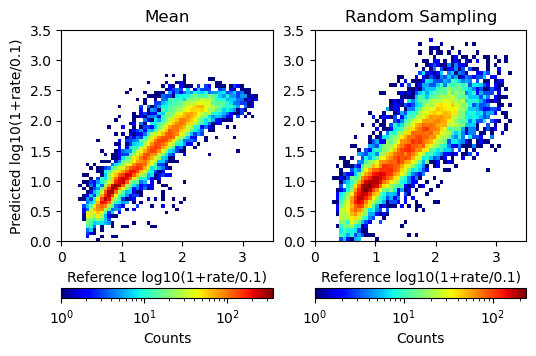

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
plt.figure(figsize=(6,4))
sfc_refL=np.array(sfc_refL)
sfc_meanL=np.array(sfc_meanL)
sfc_pertL=np.array(sfc_pertL)
a=np.where(sfc_refL>0)
b=np.where(sfc_pertL[a]>0)
ax=plt.subplot(121)
h11=plt.hist2d(np.array(sfc_refL)[a][b],np.array(sfc_meanL)[a][b],bins=50,cmap='jet',norm=LogNorm())
plt.xlim(0,3.5)
plt.ylim(0,3.5)
plt.xlabel('Reference log10(1+rate/0.1)')
plt.ylabel('Predicted log10(1+rate/0.1)')
plt.title('Mean')
ax.set_aspect('equal')
plt.colorbar(h11[3],orientation='horizontal',label='Counts')
ax2=plt.subplot(122)
h12=plt.hist2d(np.array(sfc_refL)[a][b],np.array(sfc_pertL)[a][b],bins=50,cmap='jet',norm=LogNorm())
plt.xlim(0,3.5)
plt.ylim(0,3.5)
plt.xlabel('Reference log10(1+rate/0.1)')
plt.title('Random Sampling')
ax2.set_aspect('equal')
plt.tight_layout
plt.colorbar(h12[3],orientation='horizontal',label='Counts')

(-0.014317378958449312, -0.012405740448931998)


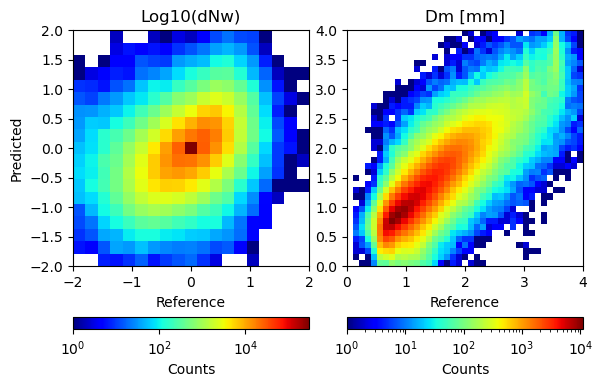

In [446]:
plt.figure(figsize=(6,4))
ax=plt.subplot(121)
h2d=plt.hist2d(np.array(validL).flatten(),np.array(predL).flatten(),bins=np.linspace(-2,2,20),cmap='jet',norm=LogNorm())
print((np.array(predL).mean(),np.array(validL).mean()))
ax.set_aspect('equal')
plt.colorbar(h2d[-1],label='Counts',orientation='horizontal')
plt.xlabel('Reference')
plt.ylabel('Predicted')
plt.title('Log10(dNw)')
ax2=plt.subplot(122)
h2d_2=plt.hist2d(np.array(dm_refL).flatten(),np.array(dm_predL).flatten(),bins=[np.linspace(0,4,40),np.linspace(0,4,40)],cmap='jet',norm=LogNorm())
ax2.set_aspect('equal')
plt.xlabel('Reference')
plt.title('Dm [mm]')
plt.colorbar(h2d_2[-1],label='Counts',orientation='horizontal')
plt.tight_layout()
plt.savefig('logdNw_and_Dm.png',dpi=300)

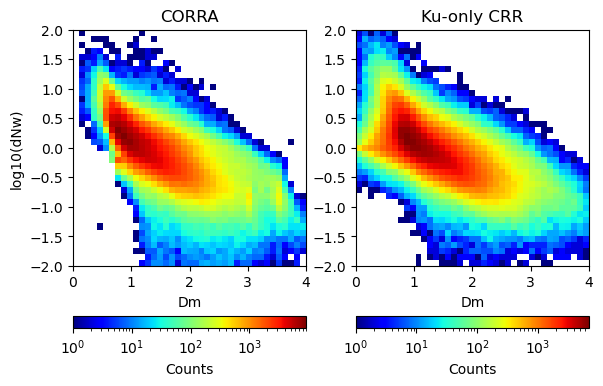

In [440]:

plt.figure(figsize=(6,4))
ax1=plt.subplot(122)
h2d_1=plt.hist2d(np.array(dm_predL).flatten(),np.array(nw_predL).flatten(),bins=[np.linspace(0,4,40),np.linspace(-2,2,40)],cmap='jet',norm=LogNorm())
plt.xlabel('Dm')
plt.title('Ku-only CRR')
plt.colorbar(h2d_1[-1],label='Counts',orientation='horizontal')
plt.ylim(-2,2)
ax1=plt.subplot(121)
plt.title('CORRA')
h2d_2=plt.hist2d(np.array(dm_refL).flatten(),np.array(nw_refL).flatten(),bins=[np.linspace(0,4,40),np.linspace(-2,2,40)],cmap='jet',norm=LogNorm())
plt.xlabel('Dm')
plt.ylabel('log10(dNw)')
plt.colorbar(h2d_2[-1],label='Counts',orientation='horizontal')
plt.ylim(-2,2)
plt.tight_layout()
plt.savefig('logdNw_vs_Dm_CRR.png',dpi=300)

#Cluster-robust inference: A guide to empirical practice